<a href="https://colab.research.google.com/github/GuillermoSainz07/Notebooks-DS/blob/main/Clustering_Inversionistas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_excel('ProcessedData.xlsx')
df.head()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


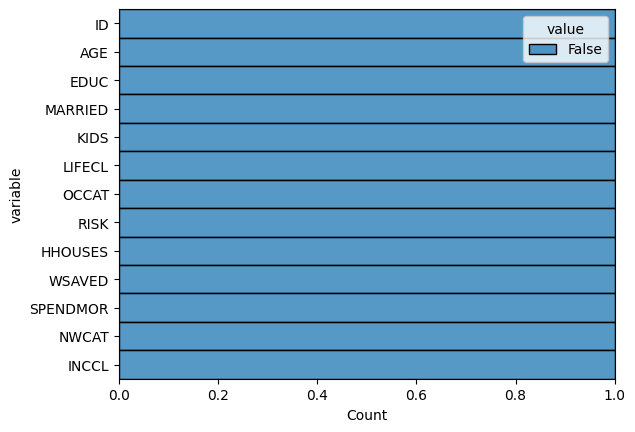

ID          False
AGE         False
EDUC        False
MARRIED     False
KIDS        False
LIFECL      False
OCCAT       False
RISK        False
HHOUSES     False
WSAVED      False
SPENDMOR    False
NWCAT       False
INCCL       False
dtype: bool


In [ ]:
sns.histplot(df.isna().melt(),y='variable', hue='value', multiple='fill')
plt.show()
print(df.isna().any())

In [ ]:
X = df.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


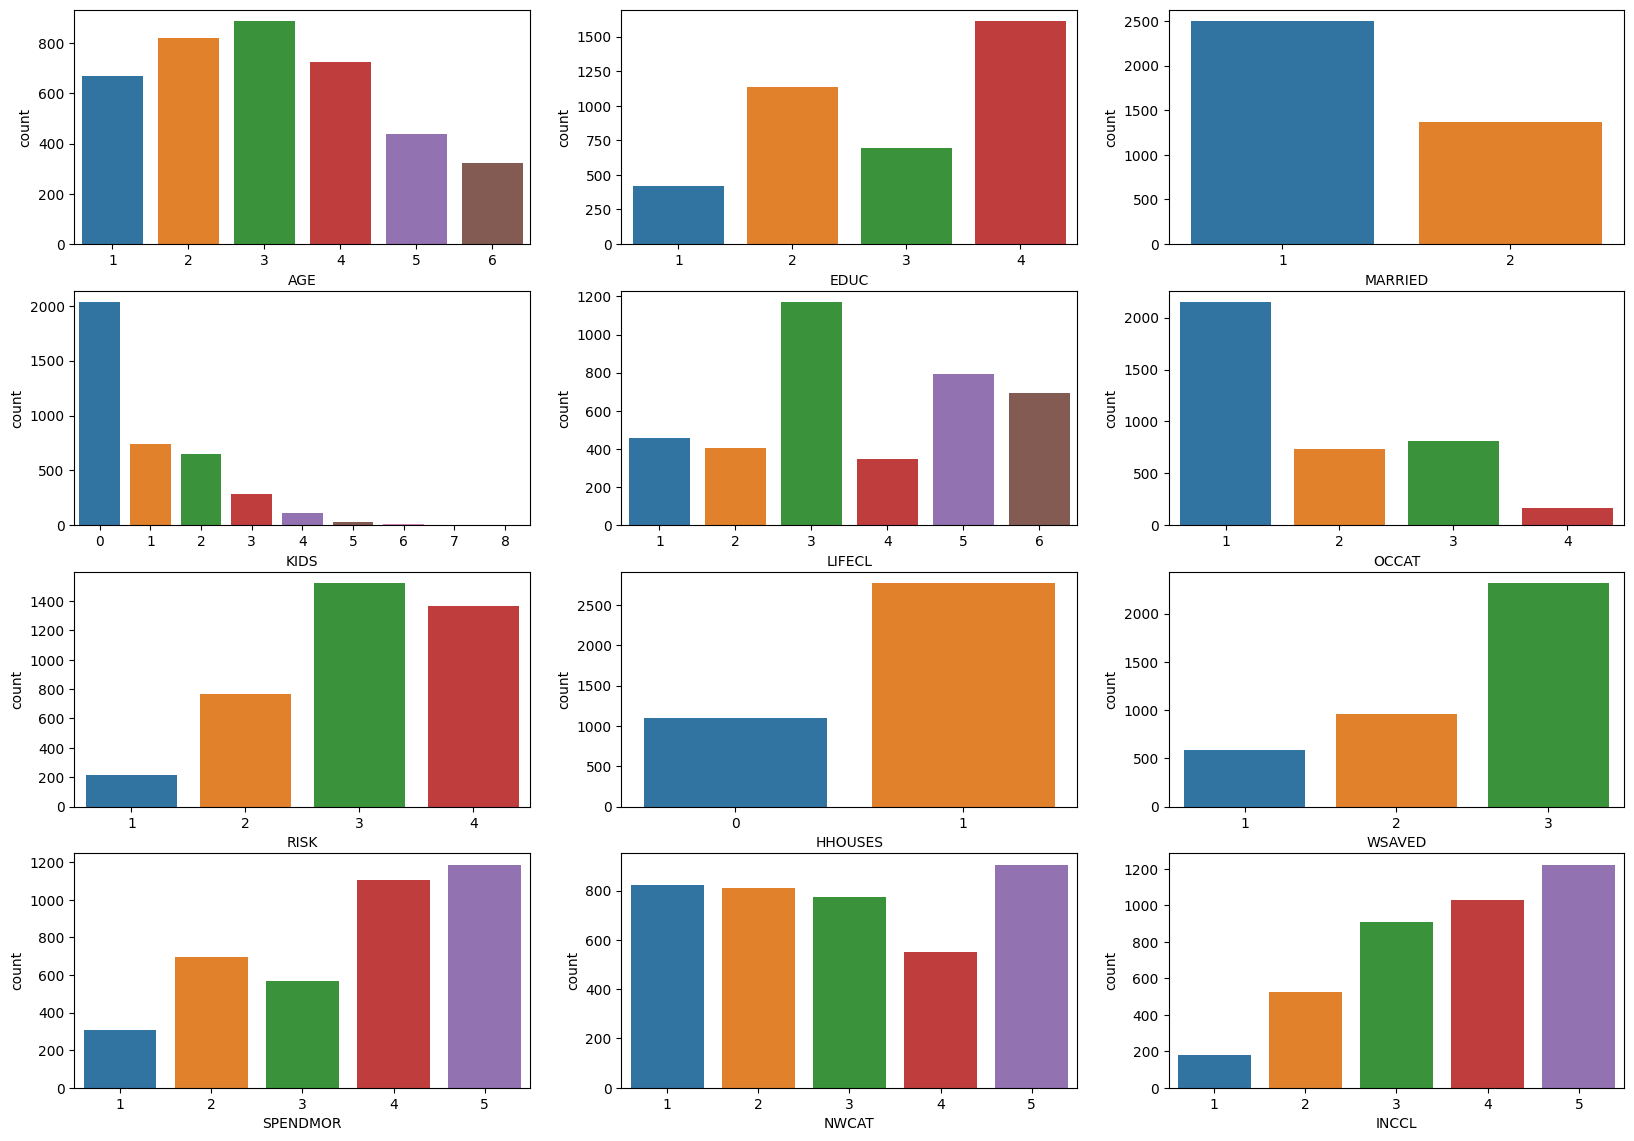

In [ ]:
fig, axes = plt.subplots(4,3, figsize=(20,14))
for i,n in enumerate(X.columns):
  ax = axes[i//3, i%3]
  sns.countplot(X, x=n, ax=ax)
plt.show()


Encontrar el numero optimo de cluster para kmeans

In [ ]:
modelos = [KMeans(n_clusters=i, n_init=10).fit(X) for i in range(2,50)]

In [ ]:
metrica = [modelo.inertia_ for modelo in modelos]

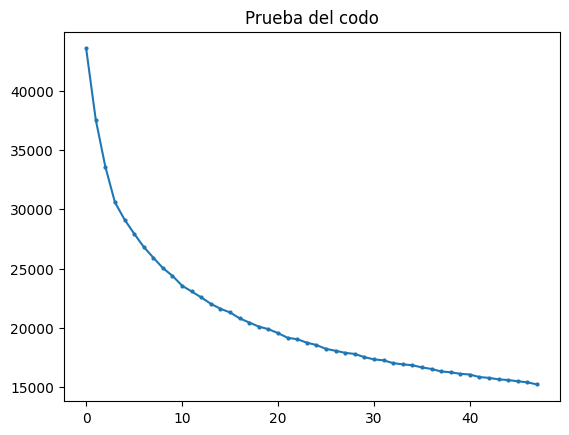

In [ ]:
plt.plot(metrica, marker='o', ms=2)
plt.title('Prueba del codo')
plt.show()

In [ ]:
metrica_silhouette = [silhouette_score(X, modelo.labels_) for modelo in modelos]

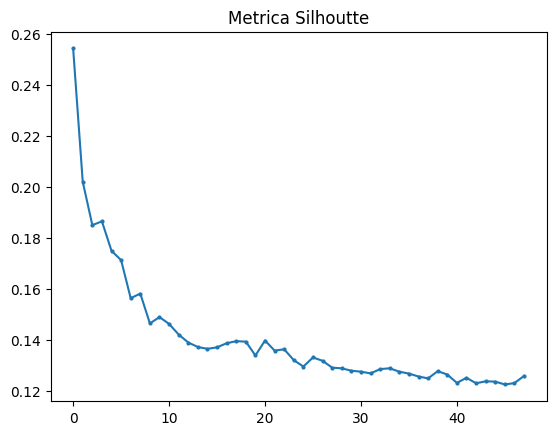

In [ ]:
plt.plot(metrica_silhouette, marker='o',ms=2)
plt.title('Metrica Silhoutte')
plt.show()

Modelo Kmeans

In [ ]:
kmeans_model = KMeans(n_clusters=7, n_init=10)
kmeans_model.fit(X)

KMeans(n_clusters=7, n_init=10)

In [ ]:
target_labels = kmeans_model.predict(X)

Encontrar el numero optimo de cluster gaussian mixture

In [ ]:
modelos_gm = [GaussianMixture(n_components=i).fit(X) for i in range(1,50)]

In [ ]:
# Criterio de informacion bayesiano
metrica_bic = [modelo.bic(X) for modelo in modelos_gm]

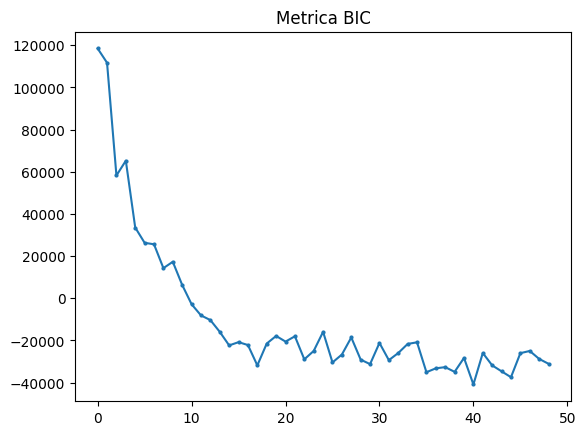

In [ ]:
plt.plot(metrica_bic, marker='o', ms=2)
plt.title('Metrica BIC')
plt.show()

In [ ]:
modelo_bayesiano = BayesianGaussianMixture(n_components=100)
modelo_bayesiano.fit(X)

BayesianGaussianMixture(n_components=100)

In [ ]:
len(np.round(modelo_bayesiano.weights_,2)[np.round(modelo_bayesiano.weights_,2) >0])

25

In [ ]:
modelo_gaussiano = GaussianMixture(n_components=25,n_init=10)
modelo_gaussiano.fit(X)

GaussianMixture(n_components=25, n_init=10)

In [ ]:
labels_gm = modelo_gaussiano.predict(X)

Comparamos los algoritmos

In [ ]:
metric_km = silhouette_score(X,kmeans_model.labels_)
metric_gm = silhouette_score(X, labels_gm)

print(f' La metrica para KMeans: {metric_km}', '\n',
      f'La metrica para GM: {metric_gm}')

 La metrica para KMeans: 0.1712899430112156 
 La metrica para GM: -0.00442485767420205


Graficamos el promedio de cada variable del cluster

In [ ]:
data = pd.concat([X, pd.Series(kmeans_model.labels_)], axis=1)
data = data.rename(columns={0:'Cluster'})
data.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL,Cluster
0,3,2,1,0,2,1,3,1,1,5,3,4,2
1,4,4,1,2,5,2,3,0,2,5,5,5,6
2,3,1,1,2,3,2,2,1,2,4,4,4,5
3,3,1,1,2,3,2,2,1,2,4,3,4,4
4,4,3,1,1,5,1,2,1,3,3,5,5,6


In [ ]:
data_cluster = data.groupby('Cluster').mean()

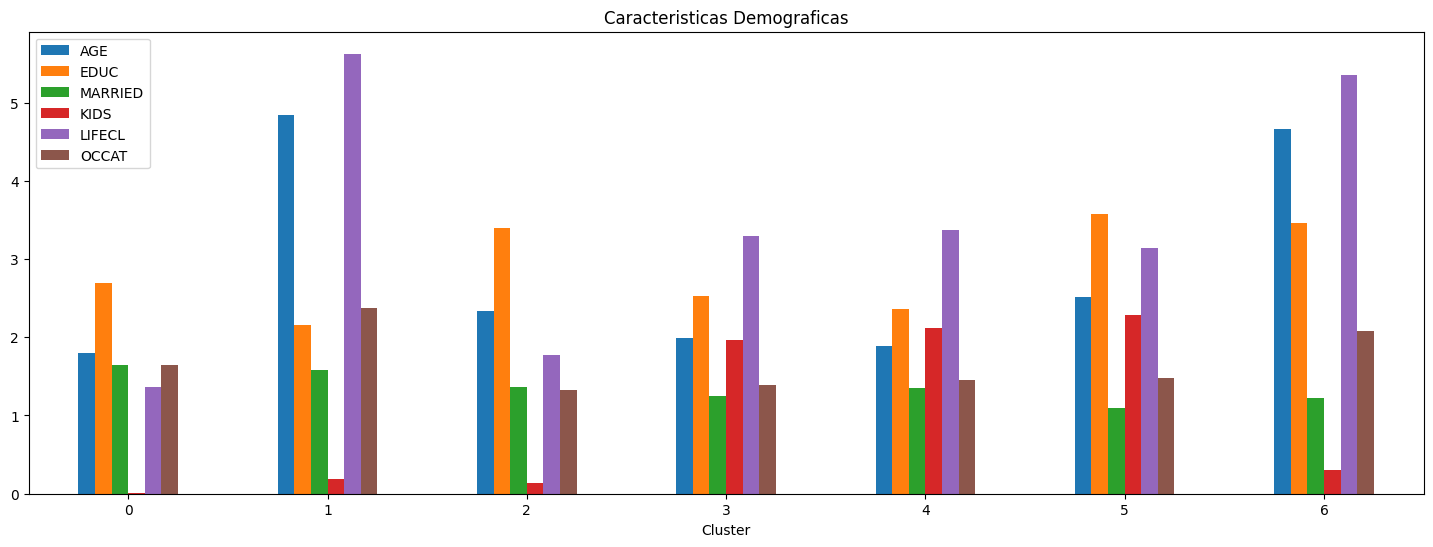

In [ ]:
data_cluster[['AGE','EDUC','MARRIED','KIDS',
              'LIFECL','OCCAT']].plot(kind='bar', rot=0,
                                      figsize=(18,6),
                                      title='Caracteristicas Demograficas')
plt.show()

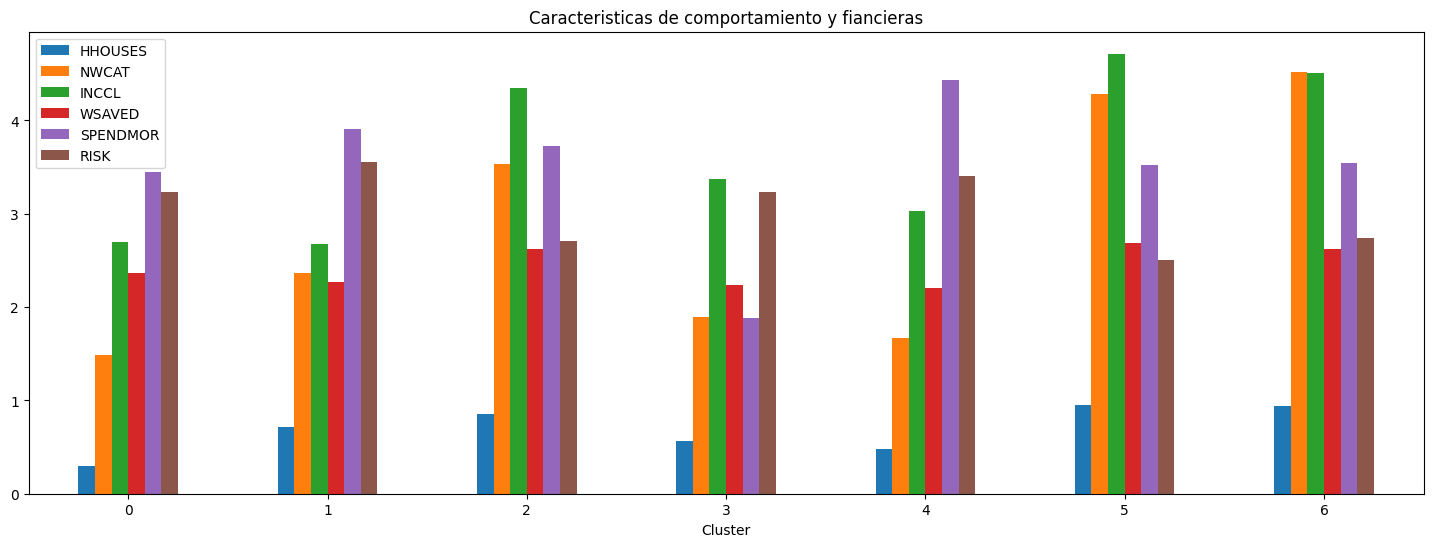

In [ ]:
data_cluster[['HHOUSES','NWCAT','INCCL','WSAVED',
              'SPENDMOR','RISK']].plot(kind='bar', rot=0,
                                       figsize=(18,6),
                                       title='Caracteristicas de comportamiento y fiancieras')
plt.show()